This is a starter notebook for an updated module 5 of ML Zoomcamp

The code is based on the modules 3 and 4. We use the same dataset: [telco customer churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [41]:
import pandas as pd
import numpy as np
import sklearn

In [42]:
print(f'pandas=={pd.__version__}')
print(f'numpy=={np.__version__}')
print(f'sklearn=={sklearn.__version__}')

pandas==2.3.1
numpy==2.3.2
sklearn==1.7.1


In [43]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

---

### Carga de datos
Se descarga el dataset de churn de clientes desde un enlace público y se carga en un DataFrame de pandas.


In [44]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(data_url)

In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

### Normalización de columnas y selección de categóricas
Se transforman los nombres de las columnas a minúsculas y con guiones bajos en lugar de espacios.  
Luego, se identifica la lista de columnas categóricas del DataFrame.


In [46]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [47]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

---

### Conversión y limpieza de la columna `totalcharges`
Se convierte `totalcharges` a tipo numérico, reemplazando valores no convertibles por `NaN`, y luego se rellenan esos `NaN` con 0.


In [48]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

---

### Codificación de la columna objetivo
Se transforma la columna `churn` en valores binarios: 1 si el cliente se dio de baja (`yes`) y 0 en caso contrario.


In [49]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [50]:
y_train = df.churn

In [51]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

---

### Vectorización de características
Se utiliza `DictVectorizer` para convertir las columnas categóricas y numéricas en una matriz de características lista para modelos de machine learning.


In [52]:
dv = DictVectorizer()

In [54]:
train_dict = df[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train[:3].todense()

matrix([[1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 2.9850e+01, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.9850e+01],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 5.6950e+01, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 

---

### Entrenamiento del modelo
Se crea un modelo de regresión logística y se ajusta a los datos de entrenamiento.

> Nota educativa
> Aquí se utiliza todo el dataset para fines didácticos; en un escenario real, siempre se debe separar en conjuntos de entrenamiento y prueba.


In [55]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


---

### Predicción para un nuevo cliente
Se define un nuevo registro de cliente, se transforma con el `DictVectorizer` y se calcula la probabilidad de churn usando el modelo entrenado.


In [19]:
datapoint = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'no',
    'phoneservice': 'no',
    'multiplelines': 'no_phone_service',
    'internetservice': 'dsl',
    'onlinesecurity': 'no',
    'onlinebackup': 'yes',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'no',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 29.85,
    'totalcharges': 29.85
}

In [40]:
X = dv.transform(datapoint)
X.todense()

matrix([[ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
          0.  ,  1.  ,  0.  ,  0.  , 29.85,  0.  ,  1.  ,  0.  ,  0.  ,
          0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
          0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
          0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  , 29.85]])

In [45]:
model.predict_proba(X)[0,1]

np.float64(0.6638167617162171)

---

### Guardado y carga del modelo
Se serializan el `DictVectorizer` y el modelo de regresión logística usando `pickle` para poder reutilizarlos más tarde sin necesidad de reentrenar.


In [25]:
import pickle

In [26]:
with open('model_logistic_regression.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [28]:
!pwd

/home/joviedo/github-repos/fastapi-ml-deploy/notebook/workshop_fastapi_ml


In [27]:
!ls

01-workshop-uv-fastapi.ipynb  model_logistic_regression.bin


In [29]:
with open('model_logistic_regression.bin', 'rb') as f_in:
    (dv, model) = pickle.load(f_in)

---

### Pipeline de entrenamiento y predicción
Se crea un pipeline que combina la vectorización de características y la regresión logística, se entrena con los datos y se predice la probabilidad de churn para un nuevo cliente.


In [30]:
from sklearn.pipeline import make_pipeline

In [31]:
pipeline = make_pipeline(
    DictVectorizer(),
    LogisticRegression(solver='liblinear')
)

In [32]:
pipeline.fit(train_dict, y_train)

,steps,"[('dictvectorizer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True
,penalty,'l2'
,dual,False
,tol,0.0001


In [33]:
pipeline.predict_proba(datapoint)[0, 1]

np.float64(0.6638167617162171)

### Conversión de notebook a script
Se convierte la notebook en un archivo `.py` con `nbconvert`, luego se renombra como `train.py`.


In [1]:
!jupyter nbconvert --to=script 01-workshop-uv-fastapi.ipynb

[NbConvertApp] Converting notebook 01-workshop-uv-fastapi.ipynb to script
[NbConvertApp] Writing 6693 bytes to 01-workshop-uv-fastapi.py


In [2]:
!mv 01-workshop-uv-fastapi.ipynb train.py

In [3]:
!ls

01-workshop-uv-fastapi.py  model_logistic_regression.bin  train.py


### Train

Contenido del script `02-train.py`

```python
#!/usr/bin/env python

# --- Importacion de Librerías ---
import pickle
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction import  DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# --- Verificacion de Versiones ---
print(f'pandas=={pd.__version__}')
print(f'numpy=={np.__version__}')
print(f'sklearn=={sklearn.__version__}')


# --- Funcion para Cargar y Preparar los Datos ---
def load_data():
    """
    Esta función descarga los datos de una URL, los limpia y los prepara para el entrenamiento
    """

    data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
    df = pd.read_csv(data_url)

    # Limpieza de los Nombres de las Columnas
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # Identificamos las columnas que contienen texto (tipo 'object')
    categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

    # Limpieza de los Datos Categóricos
    for c in categorical_columns:
        df[c] = df[c].str.lower().str.replace(' ', '_')

    # Limpieza de la Columna 'totalcharges'
    df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
    df.totalcharges = df.totalcharges.fillna(0)

    # Preparacion de la Variable Objetivo
    df.churn = (df.churn == 'yes').astype(int)

    # Devolvemos el DataFrame limpio y listo para usarse
    return df


# --- Funcion para Entrenar el Modelo ---
def train_model(df):
    """
    Esta función entrena un modelo de regresión logística usando un pipeline.
    """
    # Definimos las columnas numéricas y categoricas que usaremos como características.
    numerical = ['tenure', 'monthlycharges', 'totalcharges']

    categorical = [
        'gender',
        'seniorcitizen',
        'partner',
        'dependents',
        'phoneservice',
        'multiplelines',
        'internetservice',
        'onlinesecurity',
        'onlinebackup',
        'deviceprotection',
        'techsupport',
        'streamingtv',
        'streamingmovies',
        'contract',
        'paperlessbilling',
        'paymentmethod',
    ]

    y_train = df.churn
    # Creamos un diccionario con las características (features) para entrenar el modelo.
    train_dict = df[categorical + numerical].to_dict(orient='records')

    # Creacion del Pipeline de Entrenamiento
    pipeline = make_pipeline(
        DictVectorizer(),
        LogisticRegression(solver='liblinear')
    )

    # Entrenamos el pipeline
    pipeline.fit(train_dict, y_train)

    # Devolvemos el pipeline
    return pipeline


# --- Funcion para Guardar el Modelo ---
def save_model(pipeline, output_file):
    """
    Guarda el pipeline entrenado en un archivo usando pickle.
    """

    # Abrimos un archivo en modo de escritura binaria ('wb')
    with open(output_file, 'wb') as f_out:
        pickle.dump(pipeline, f_out)

    print(f'Model saved to {output_file}')

# --- Bloque Principal de Ejecución ---
# 1. Cargamos y preparamos los datos
df = load_data()

# 2. Entrenamos el modelo con los datos
pipeline = train_model(df)

# 3. Guardamos el modelo entrenado en un archivo llamado 'model.bin'.
save_model(pipeline, 'model_logistic_regression.bin')
```

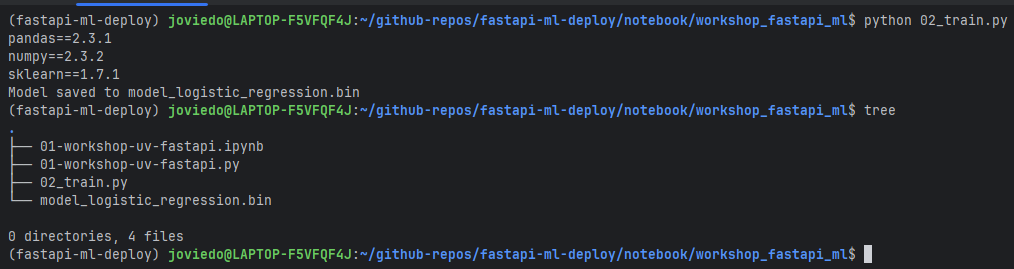

### Predict

Contenido del script `04-ping.py`, se muestra un ejemplo basico de FastAPI

```python
from fastapi import FastAPI
import uvicorn

# Importaciones:
# - FastAPI: framework para construir la API
# - uvicorn: servidor ASGI para ejecutar la aplicación


# Inicialización de la aplicación FastAPI
app = FastAPI(title="ping")


@app.get("/ping")
def ping():
    # Endpoint de prueba: responde "PONG" cuando se hace GET a /ping
    return "PONG"


if __name__ == "__main__":
    # Ejecución del servidor en el puerto 9696
    uvicorn.run(app, host="0.0.0.0", port=9696)
```

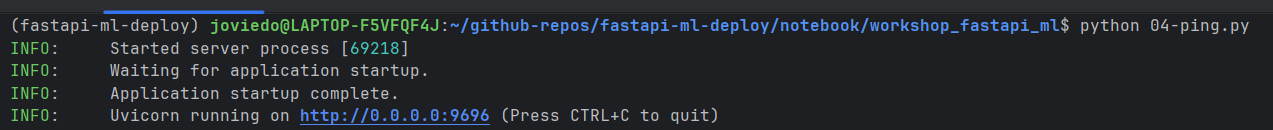

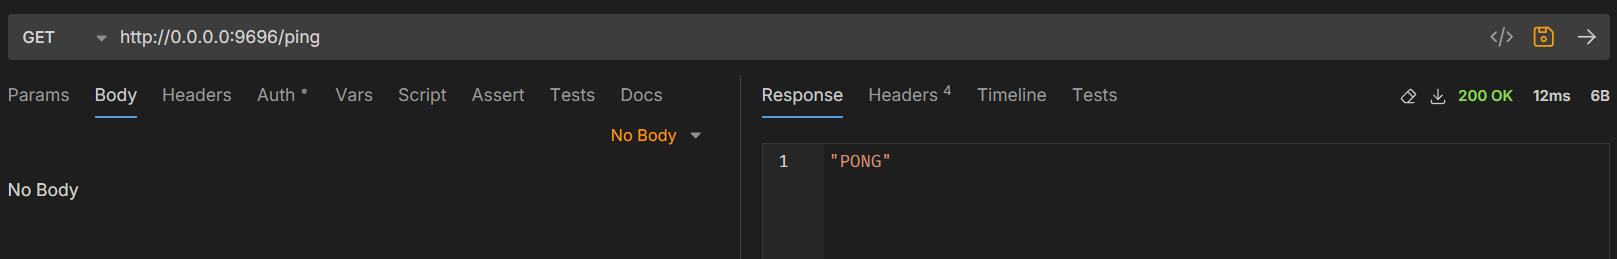

Podemos ver la documentacion que nos ofrece FastAPI de los endpoints disponibles

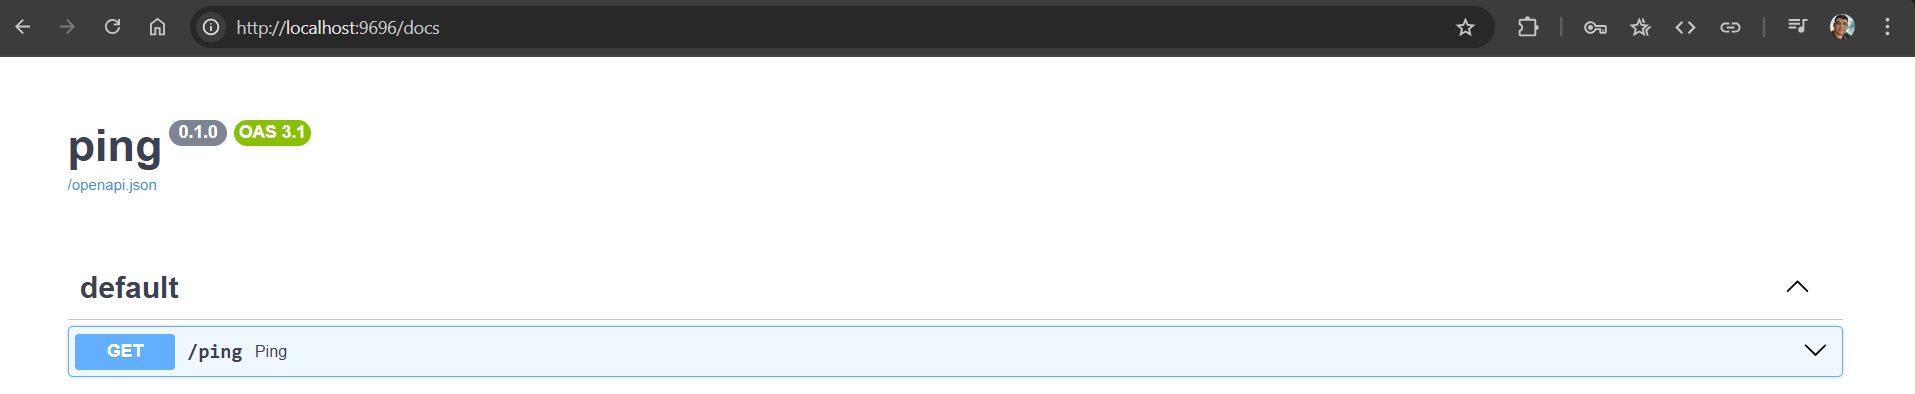

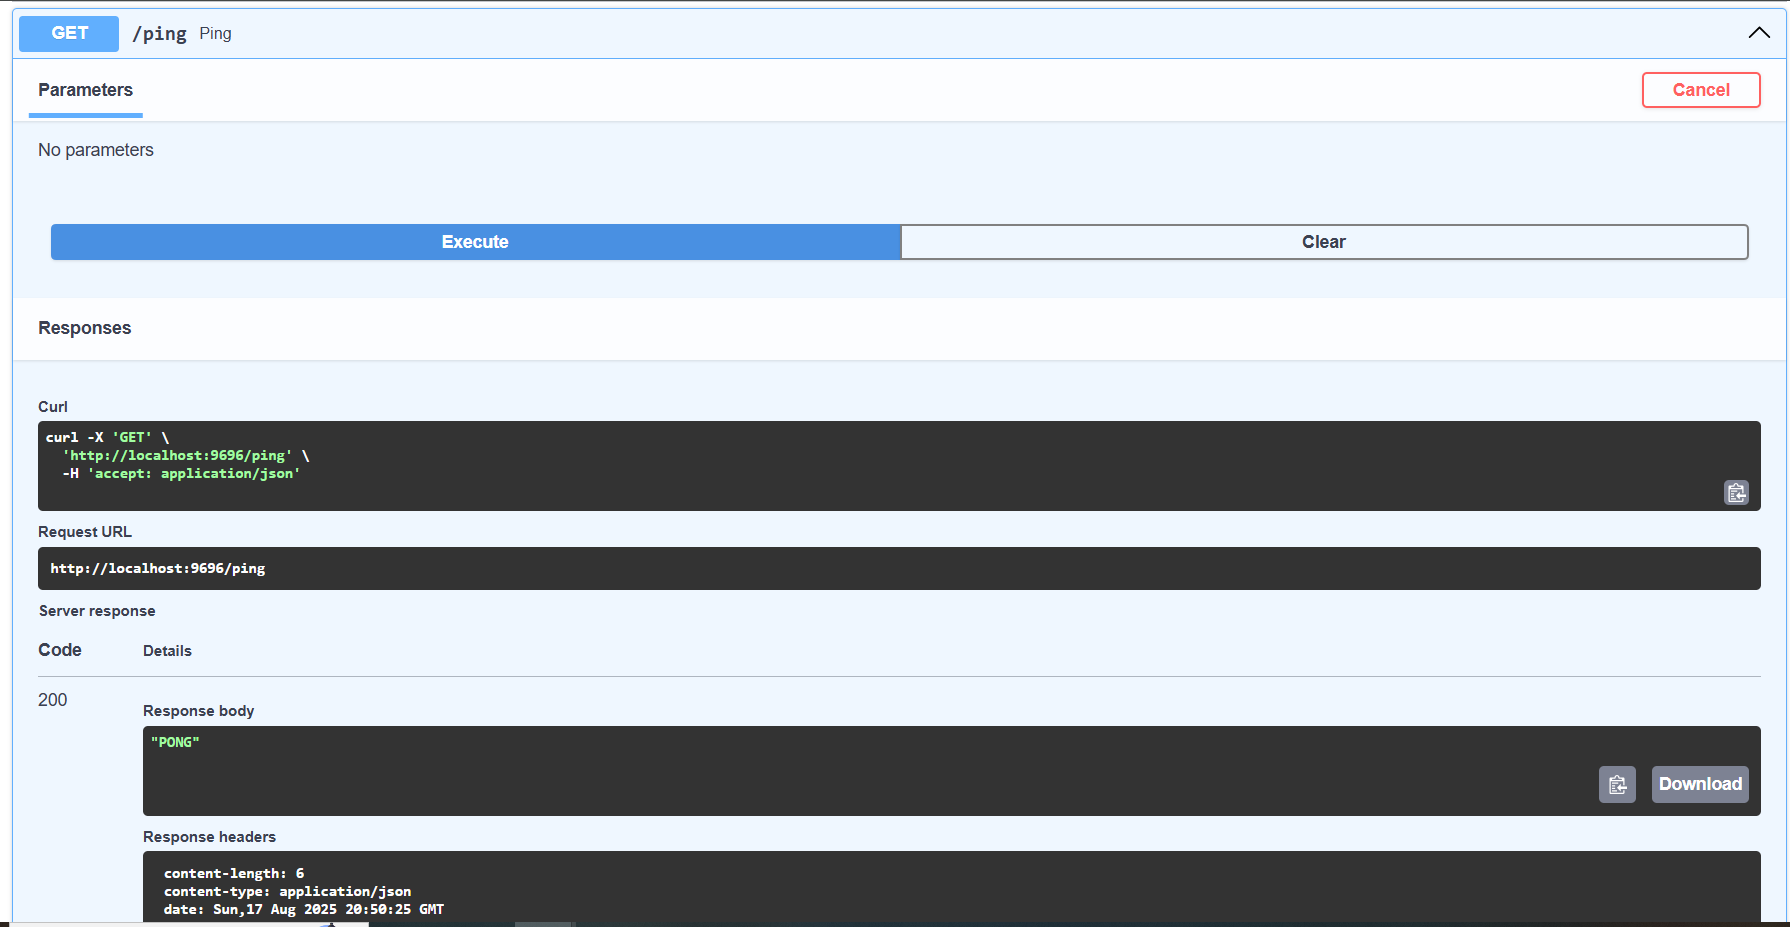

Contenido del script ` 03-predict.py`

```python
import pickle
from typing import Literal
from pydantic import BaseModel, Field
from fastapi import FastAPI
import uvicorn

# 📌 Importaciones necesarias:
# - pickle: para cargar el modelo entrenado
# - typing.Literal: para validar valores estrictos de entrada
# - pydantic.BaseModel & Field: para definir y validar esquemas de datos
# - FastAPI: framework para crear la API
# - uvicorn: servidor ASGI para ejecutar la aplicación


class Customer(BaseModel):
    # Modelo de entrada: define el esquema del cliente con validaciones de tipos
    gender: Literal["male", "female"]
    seniorcitizen: Literal[0, 1]
    partner: Literal["yes", "no"]
    dependents: Literal["yes", "no"]
    phoneservice: Literal["yes", "no"]
    multiplelines: Literal["no", "yes", "no_phone_service"]
    internetservice: Literal["dsl", "fiber_optic", "no"]
    onlinesecurity: Literal["no", "yes", "no_internet_service"]
    onlinebackup: Literal["no", "yes", "no_internet_service"]
    deviceprotection: Literal["no", "yes", "no_internet_service"]
    techsupport: Literal["no", "yes", "no_internet_service"]
    streamingtv: Literal["no", "yes", "no_internet_service"]
    streamingmovies: Literal["no", "yes", "no_internet_service"]
    contract: Literal["month-to-month", "one_year", "two_year"]
    paperlessbilling: Literal["yes", "no"]
    paymentmethod: Literal[
        "electronic_check",
        "mailed_check",
        "bank_transfer_(automatic)",
        "credit_card_(automatic)",
    ]
    tenure: int = Field(..., ge=0)               # Debe ser mayor o igual a 0
    monthlycharges: float = Field(..., ge=0.0)   # Debe ser >= 0.0
    totalcharges: float = Field(..., ge=0.0)     # Debe ser >= 0.0


class PredictResponse(BaseModel):
    # Modelo de salida: define la estructura de la respuesta
    churn_probability: float
    churn: bool


# Inicialización de la aplicación FastAPI
app = FastAPI(title="customer-churn-prediction")

# Cargar el pipeline entrenado desde archivo binario
with open('model_logistic_regression.bin', 'rb') as f_in:
    pipeline = pickle.load(f_in)


def predict_single(customer):
    # Función auxiliar: calcula la probabilidad de churn para un cliente
    result = pipeline.predict_proba(customer)[0, 1]
    return float(result)


@app.post("/predict")
def predict(customer: Customer) -> PredictResponse:
    # Endpoint principal: recibe un cliente, calcula churn y devuelve respuesta
    prob = predict_single(customer.model_dump())

    return PredictResponse(
        churn_probability=prob,
        churn=prob >= 0.5
    )


if __name__ == "__main__":
    # Ejecuta el servidor Uvicorn en el puerto 9696
    uvicorn.run(app, host="0.0.0.0", port=9696)

```

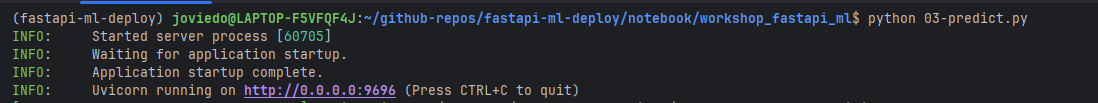

---

### Consumo del modelo vía API
Se envía un registro de cliente al endpoint `/predict` usando una petición POST y se reciben las predicciones en formato JSON desde el servicio en ejecución.


In [5]:
import requests

In [6]:
url = 'http://localhost:9696/predict'

customer = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'no',
    'phoneservice': 'no',
    'multiplelines': 'no_phone_service',
    'internetservice': 'dsl',
    'onlinesecurity': 'no',
    'onlinebackup': 'yes',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'no',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 29.85,
    'totalcharges': 29.85
}

response = requests.post(url, json=customer)

In [7]:
predictions = response.json()

In [8]:
predictions

{'churn_probability': 0.6638167617162171, 'churn': True}

### Uso de la predicción en lógica de negocio  
Se utiliza la salida del modelo para tomar una decisión: si el cliente tiene riesgo de churn, se acepta la solicitud de préstamo; en caso contrario, se rechaza.  


In [39]:
if predictions['churn']:
    print('accept loan application')
else:
    print('reject loan application')

reject loan application


Contenido del script `05-test.py`

```python
import requests

# Importación:
# - requests: para enviar solicitudes HTTP al endpoint de predicción


url = 'http://localhost:9696/predict'

# Definición de un cliente de prueba con sus características
customer = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'no',
    'phoneservice': 'no',
    'multiplelines': 'no_phone_service',
    'internetservice': 'dsl',
    'onlinesecurity': 'no',
    'onlinebackup': 'yes',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'no',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 29.85,
    'totalcharges': 29.85
}

# Enviar la solicitud POST al endpoint con los datos del cliente
response = requests.post(url, json=customer)

# Obtener la respuesta en formato JSON
predictions = response.json()

# Uso de la predicción en lógica de negocio
if predictions['churn']:
    print('customer is likely to churn, send promo')
else:
    print('customer is not likely to churn')

```

---

### Pydantic

**Pydantic** es una librería que permite definir modelos de datos con validación automática, usando anotaciones de tipo de Python.  
Facilita la creación de APIs, validación de entrada de datos y asegura que los valores cumplan con las restricciones definidas.

In [2]:
from pydantic import BaseModel

class User(BaseModel):
    id: int
    name: str
    is_active: bool = True

user = User(id=1, name="Alice")
print(user)

id=1 name='Alice' is_active=True


In [7]:
user = User(id=2, name="Alice", is_active='S')
print(user)

ValidationError: 1 validation error for User
is_active
  Input should be a valid boolean, unable to interpret input [type=bool_parsing, input_value='S', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/bool_parsing

from pydantic import BaseModel, Field
from typing import List

class Address(BaseModel):
    city: str
    zipcode: str

class Customer(BaseModel):
    name: str
    age: int = Field(..., ge=18)  # debe ser >= 18
    addresses: List[Address]      # lista de direcciones anidadas

customer = Customer(
    name="Bob",
    age=30,
    addresses=[{"city": "NY", "zipcode": "10001"}]
)

print(customer)


Veamos el dominio de los valores que podemos usar para aplicar Pydantic

In [56]:
for n in numerical:
    print(df[n].describe())
    print()

for c in categorical:
    print(df[c].value_counts())
    print()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

gender
male      3555
female    3488
Name: count, dtype: int64

seniorcitizen
0    5901
1    1142
Name: count, dtype: int64

partner
no     3641
yes    3402
Name: count, dtype: int64

dependents
no     4933
yes    2110
Name: count, dtype: int64

phoneservice
yes    6361
no      682
Name: count, dtype: int64

multiplelines
no                  3390
yes                 2971
no_phone_service  

In [28]:
from typing import Literal
from pydantic import BaseModel, Field

class Customer(BaseModel):
    # Modelo de entrada: define el esquema del cliente con validaciones de tipos
    gender: Literal["male", "female"]
    seniorcitizen: Literal[0, 1]
    partner: Literal["yes", "no"]
    dependents: Literal["yes", "no"]
    phoneservice: Literal["yes", "no"]
    multiplelines: Literal["no", "yes", "no_phone_service"]
    internetservice: Literal["dsl", "fiber_optic", "no"]
    onlinesecurity: Literal["no", "yes", "no_internet_service"]
    onlinebackup: Literal["no", "yes", "no_internet_service"]
    deviceprotection: Literal["no", "yes", "no_internet_service"]
    techsupport: Literal["no", "yes", "no_internet_service"]
    streamingtv: Literal["no", "yes", "no_internet_service"]
    streamingmovies: Literal["no", "yes", "no_internet_service"]
    contract: Literal["month-to-month", "one_year", "two_year"]
    paperlessbilling: Literal["yes", "no"]
    paymentmethod: Literal[
        "electronic_check",
        "mailed_check",
        "bank_transfer_(automatic)",
        "credit_card_(automatic)",
    ]
    tenure: int = Field(..., ge=0)               # Debe ser mayor o igual a 0
    monthlycharges: float = Field(..., ge=0.0)   # Debe ser >= 0.0
    totalcharges: float = Field(..., ge=0.0)     # Debe ser >= 0.0


class PredictResponse(BaseModel):
    # Modelo de salida: define la estructura de la respuesta
    churn_probability: float
    churn: bool


In [29]:
# Valores válidos
customer = Customer(
    gender="female",
    seniorcitizen=0,
    partner="yes",
    dependents="no",
    phoneservice="yes",
    multiplelines="no",
    internetservice="dsl",
    onlinesecurity="no",
    onlinebackup="yes",
    deviceprotection="no",
    techsupport="no",
    streamingtv="no",
    streamingmovies="no",
    contract="month-to-month",
    paperlessbilling="yes",
    paymentmethod="electronic_check",
    tenure=12,
    monthlycharges=29.85,
    totalcharges=358.20
)

print(customer)

gender='female' seniorcitizen=0 partner='yes' dependents='no' phoneservice='yes' multiplelines='no' internetservice='dsl' onlinesecurity='no' onlinebackup='yes' deviceprotection='no' techsupport='no' streamingtv='no' streamingmovies='no' contract='month-to-month' paperlessbilling='yes' paymentmethod='electronic_check' tenure=12 monthlycharges=29.85 totalcharges=358.2


In [30]:
# Intento con valores inválidos
customer = Customer(
    gender="other",                  # ❌ no está permitido (solo male/female)
    seniorcitizen=2,                 # ❌ debe ser 0 o 1
    partner="maybe",                 # ❌ solo acepta yes/no
    dependents="no",
    phoneservice="yes",
    multiplelines="yes",
    internetservice="dsl",
    onlinesecurity="no",
    onlinebackup="yes",
    deviceprotection="no",
    techsupport="no",
    streamingtv="no",
    streamingmovies="no",
    contract="five_years",           # ❌ valor no permitido
    paperlessbilling="yes",
    paymentmethod="cash",            # ❌ valor no permitido
    tenure=-5,                       # ❌ debe ser >= 0
    monthlycharges=-10.0,            # ❌ debe ser >= 0.0
    totalcharges=100
)


ValidationError: 7 validation errors for Customer
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='other', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error
seniorcitizen
  Input should be 0 or 1 [type=literal_error, input_value=2, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error
partner
  Input should be 'yes' or 'no' [type=literal_error, input_value='maybe', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error
contract
  Input should be 'month-to-month', 'one_year' or 'two_year' [type=literal_error, input_value='five_years', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error
paymentmethod
  Input should be 'electronic_check', 'mailed_check', 'bank_transfer_(automatic)' or 'credit_card_(automatic)' [type=literal_error, input_value='cash', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error
tenure
  Input should be greater than or equal to 0 [type=greater_than_equal, input_value=-5, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than_equal
monthlycharges
  Input should be greater than or equal to 0 [type=greater_than_equal, input_value=-10.0, input_type=float]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than_equal

In [57]:
# Valores válidos
response = PredictResponse(
    churn_probability=0.76,
    churn=True
)

print(response)


churn_probability=0.76 churn=True


In [60]:
# Error: probabilidad como string en lugar de float
response = PredictResponse(
    churn_probability="high",   # ❌ debería ser float
    churn="154.4"                 # ❌ debería ser bool
)

ValidationError: 2 validation errors for PredictResponse
churn_probability
  Input should be a valid number, unable to parse string as a number [type=float_parsing, input_value='high', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/float_parsing
churn
  Input should be a valid boolean, unable to interpret input [type=bool_parsing, input_value='154.4', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/bool_parsing

---

### Docker

**Docker** es una plataforma que permite crear, probar y ejecutar aplicaciones dentro de **contenedores**.  
Un contenedor incluye todo lo necesario para que la aplicación funcione: código, dependencias, librerías y configuraciones, lo que garantiza que se ejecute igual en cualquier entorno (desarrollo, testing o producción).  

A continuación, se muestra un ejemplo de `Dockerfile` con comentarios que explican cada instrucción:  

```dockerfile
# Usar una imagen base ligera de Python 3.13
FROM python:3.13.5-slim-bookworm

# Copiar la herramienta uv desde otra imagen para manejar dependencias
COPY --from=ghcr.io/astral-sh/uv:latest /uv /uvx /bin/

# Establecer el directorio de trabajo dentro del contenedor
WORKDIR /code

# Añadir la carpeta de entorno virtual al PATH
ENV PATH="/code/.venv/bin:$PATH"

# Copiar archivos de configuración del proyecto
COPY "pyproject.toml" "uv.lock" ".python-version" ./

# Instalar dependencias con uv (usando lock para versiones fijas)
RUN uv sync --locked

# Copiar el archivo predict.py y el modelo entrenado
COPY "predict.py" "model_logistic_regression.bin" ./

# Exponer el puerto 9696 para la API
EXPOSE 9696

# Definir el comando de inicio: ejecutar uvicorn para levantar la API
ENTRYPOINT ["uvicorn", "predict:app", "--host", "0.0.0.0", "--port", "9696"]
```

El comando `docker build -t predict-churn .` construye una imagen Docker a partir del `Dockerfile` ubicado en el directorio actual (`.`) y la etiqueta con el nombre **predict-churn**.

```bash
docker build -t predict-churn .
```

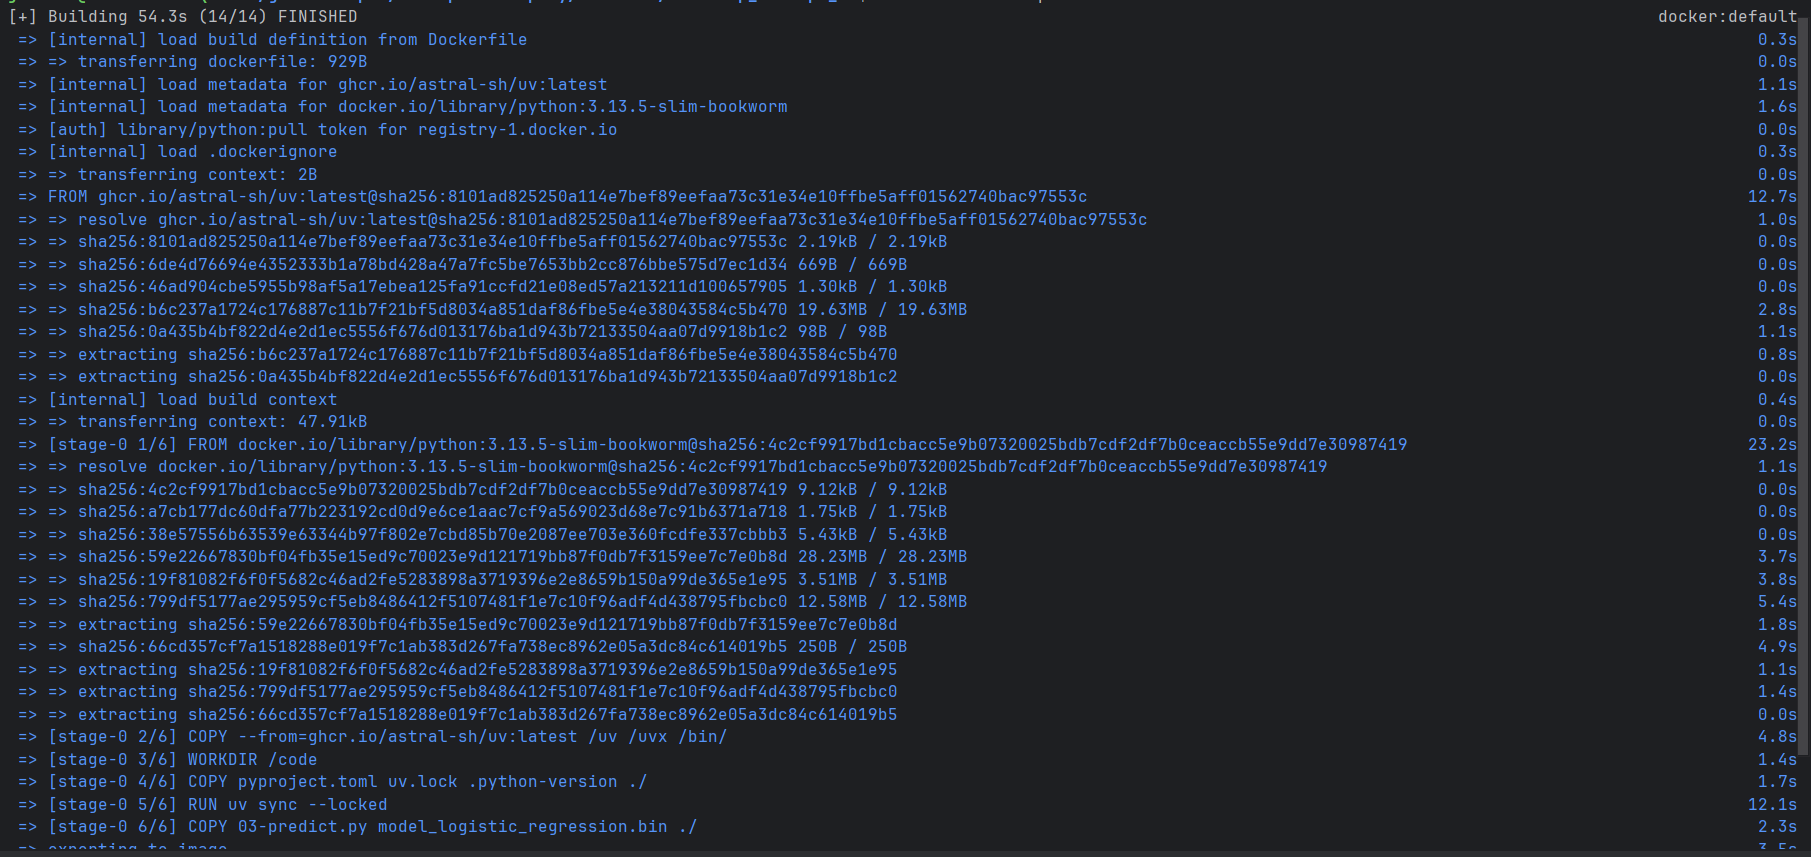

El siguiente comando permite ejecutar el contenedor creado a partir de la imagen `predict-churn`, exponiendo el servicio en el puerto **9696**:

```bash
docker run -it --rm -p 9696:9696 predict-churn
```

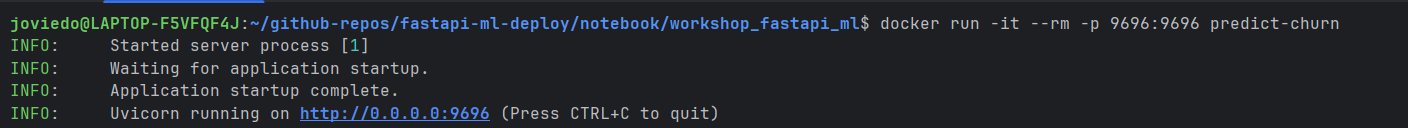

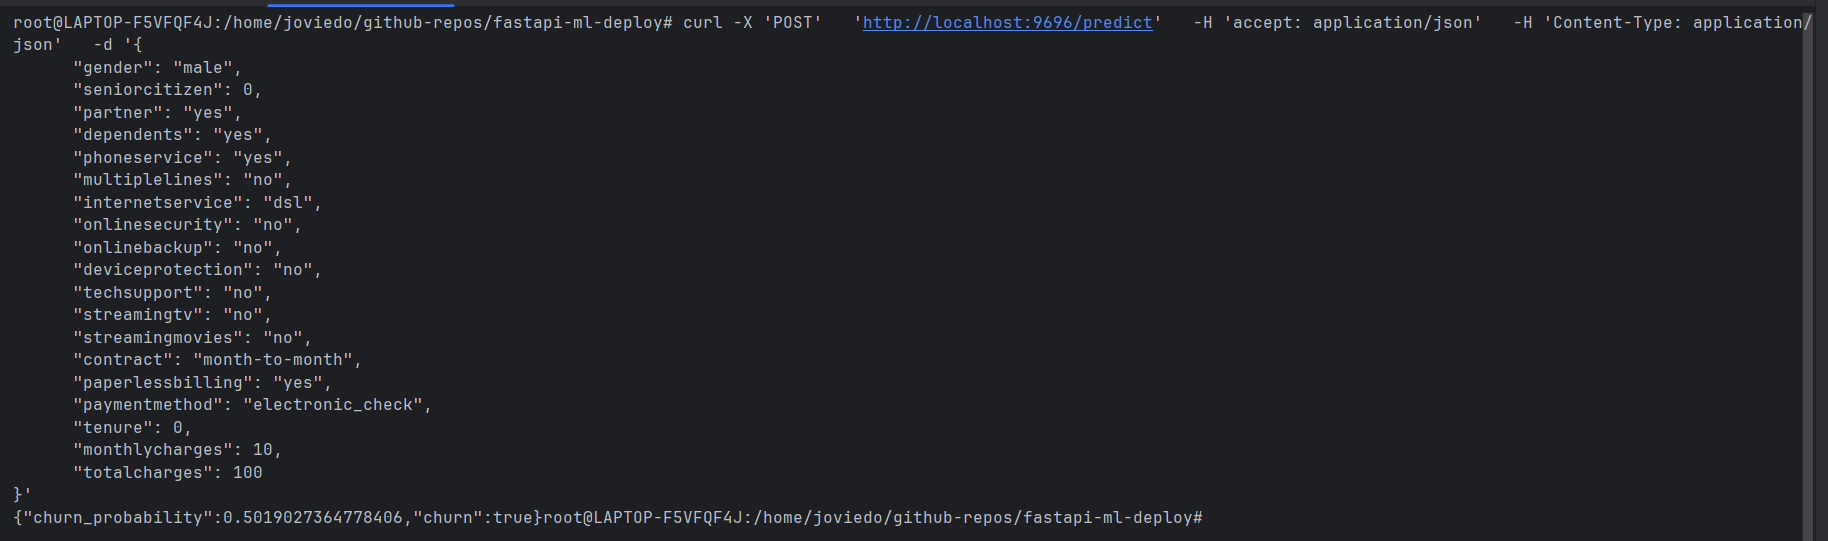

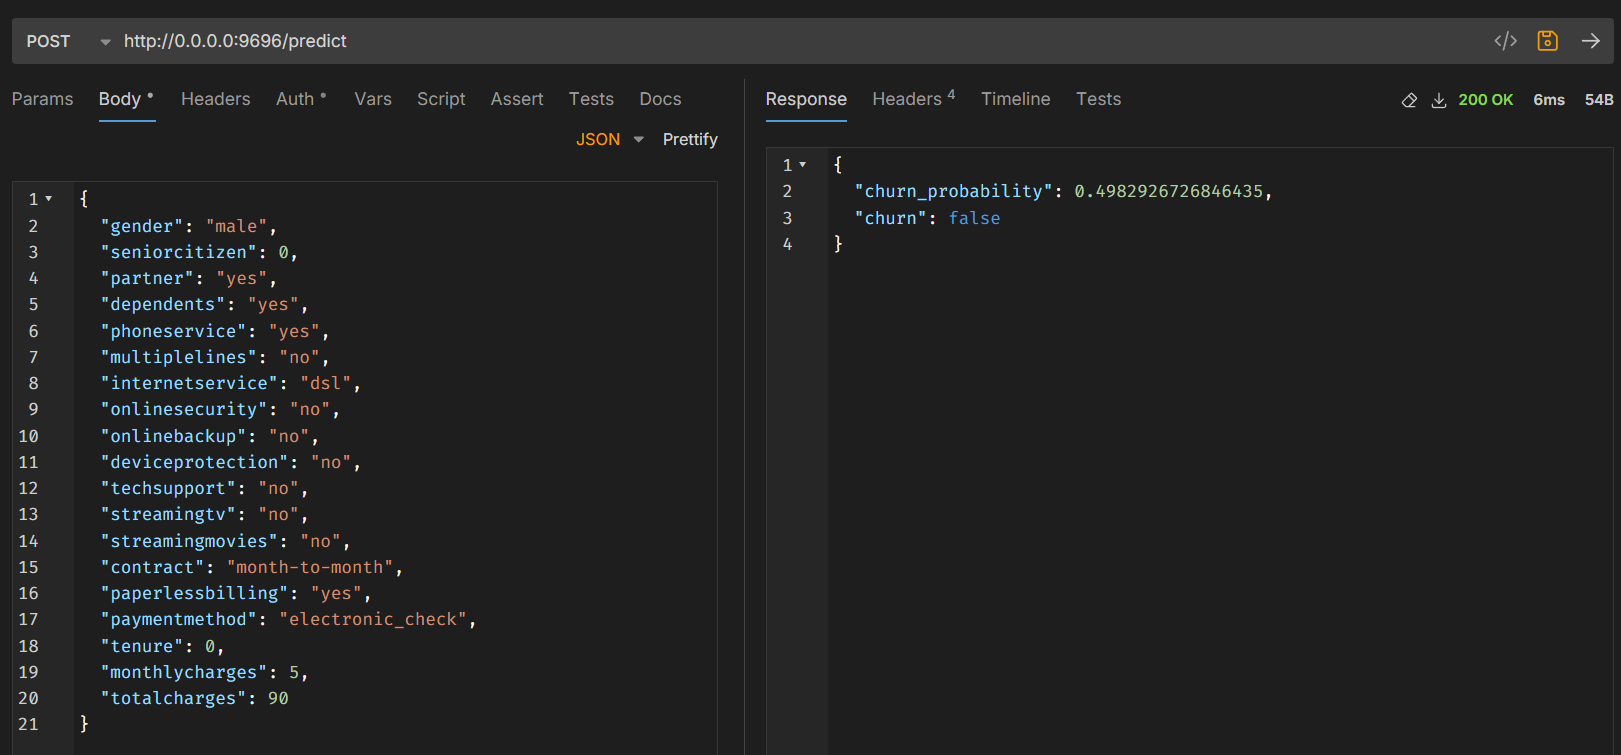

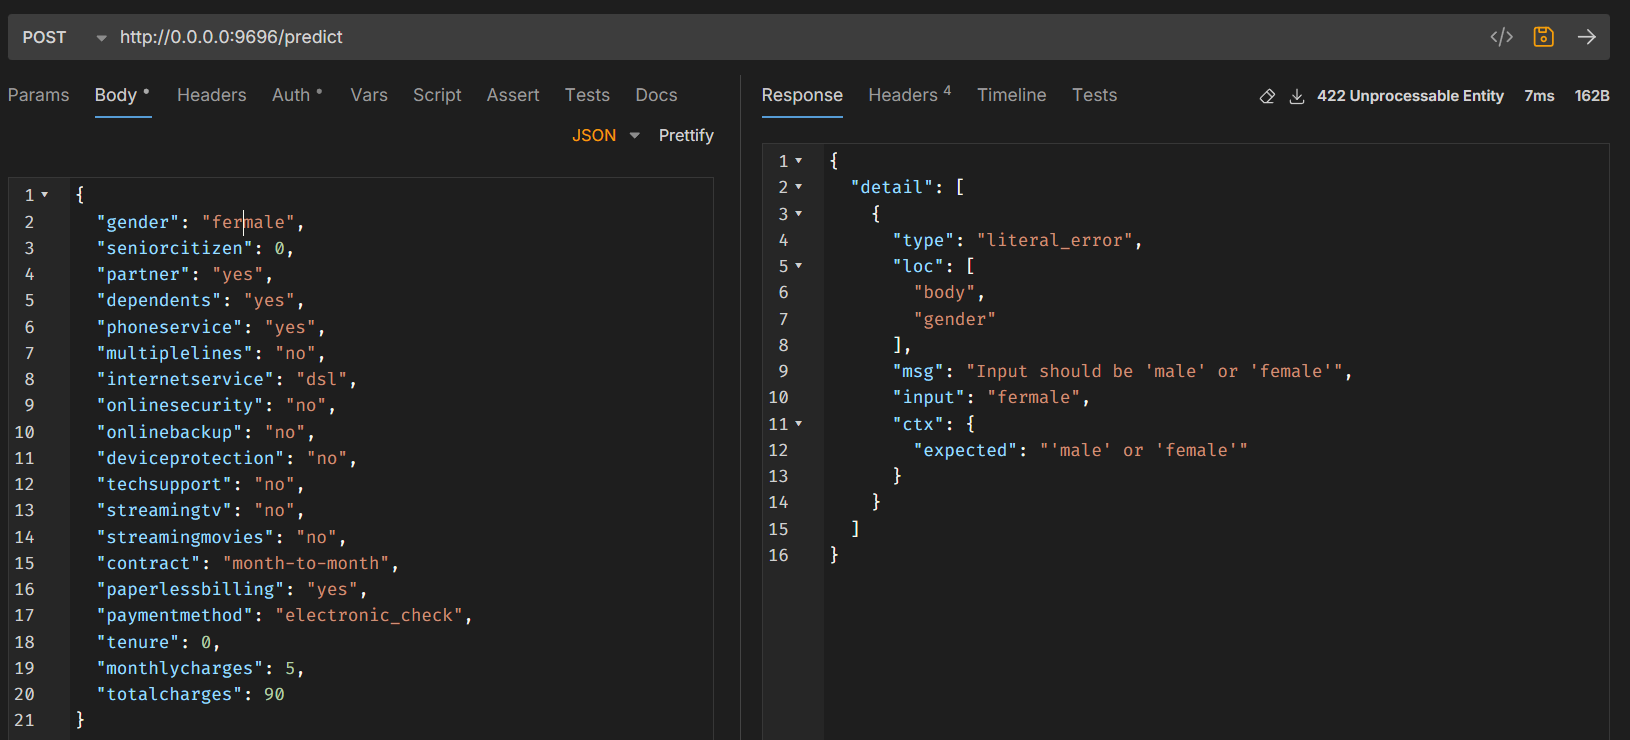

---

### Fly.io

**Fly.io** es una plataforma que permite desplegar y ejecutar aplicaciones en contenedores cerca de los usuarios finales, ofreciendo baja latencia y escalabilidad automática.  

#### Características principales

- **Despliegue global**: corre tus aplicaciones en servidores cercanos a tus usuarios, distribuidos por todo el mundo.  
- **Contenedores ligeros**: Fly.io ejecuta tus aplicaciones dentro de contenedores, similar a Docker.  
- **Escalabilidad automática**: ajusta la cantidad de instancias según la demanda de tráfico.  
- **Soporte para múltiples lenguajes**: Python, Node.js, Go, Ruby, Rust, entre otros.  
- **Bases de datos integradas**: ofrece Postgres como servicio gestionado.  
- **CLI intuitiva (`flyctl`)**: permite crear, desplegar y administrar aplicaciones desde la terminal.  


#### Uso básico

1. **Instalar la CLI**:

```bash
curl -L https://fly.io/install.sh | sh
```

**Salida esperada**:

```raw
flyctl was installed successfully to /home/user/.fly/bin/flyctl
Manually add the directory to your $HOME/.bash_profile (or similar)
  export FLYCTL_INSTALL="/home/user/.fly"
  export PATH="$FLYCTL_INSTALL/bin:$PATH"
Run '/home/user/.fly/bin/flyctl --help' to get starte
```

2. **Iniciar sesión**:

```bash
fly auth login
```

3. **Crear una aplicación nueva**:

```bash
fly launch --generate-name
```

4. **Desplegar la aplicación**:

```bash
fly deploy
```

5. **Verificar estado**:

```bash
fly status
fly apps list
```

6. **Abrir App**:

```bash
fly apps open
```

7. **Destruir App**:

```bash
fly apps destroy <APP_NAME>
```

Fly.io es ideal para **aplicaciones web, APIs y microservicios** que necesitan baja latencia, despliegue rápido y gestión sencilla de infraestructura sin administrar servidores directamente.

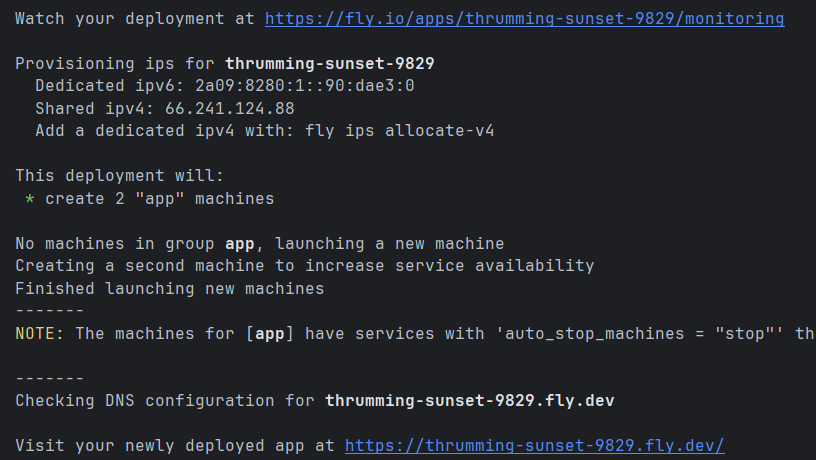

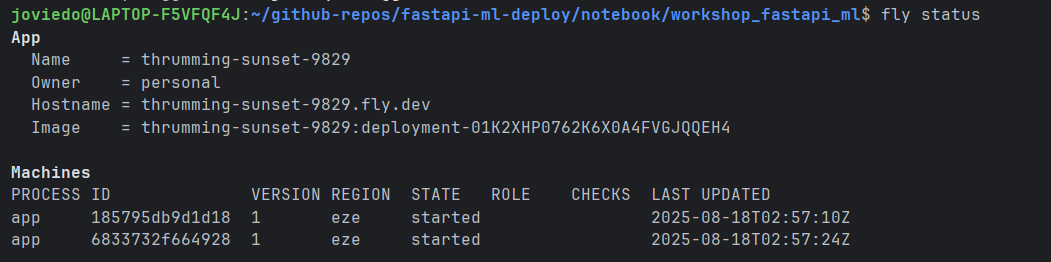

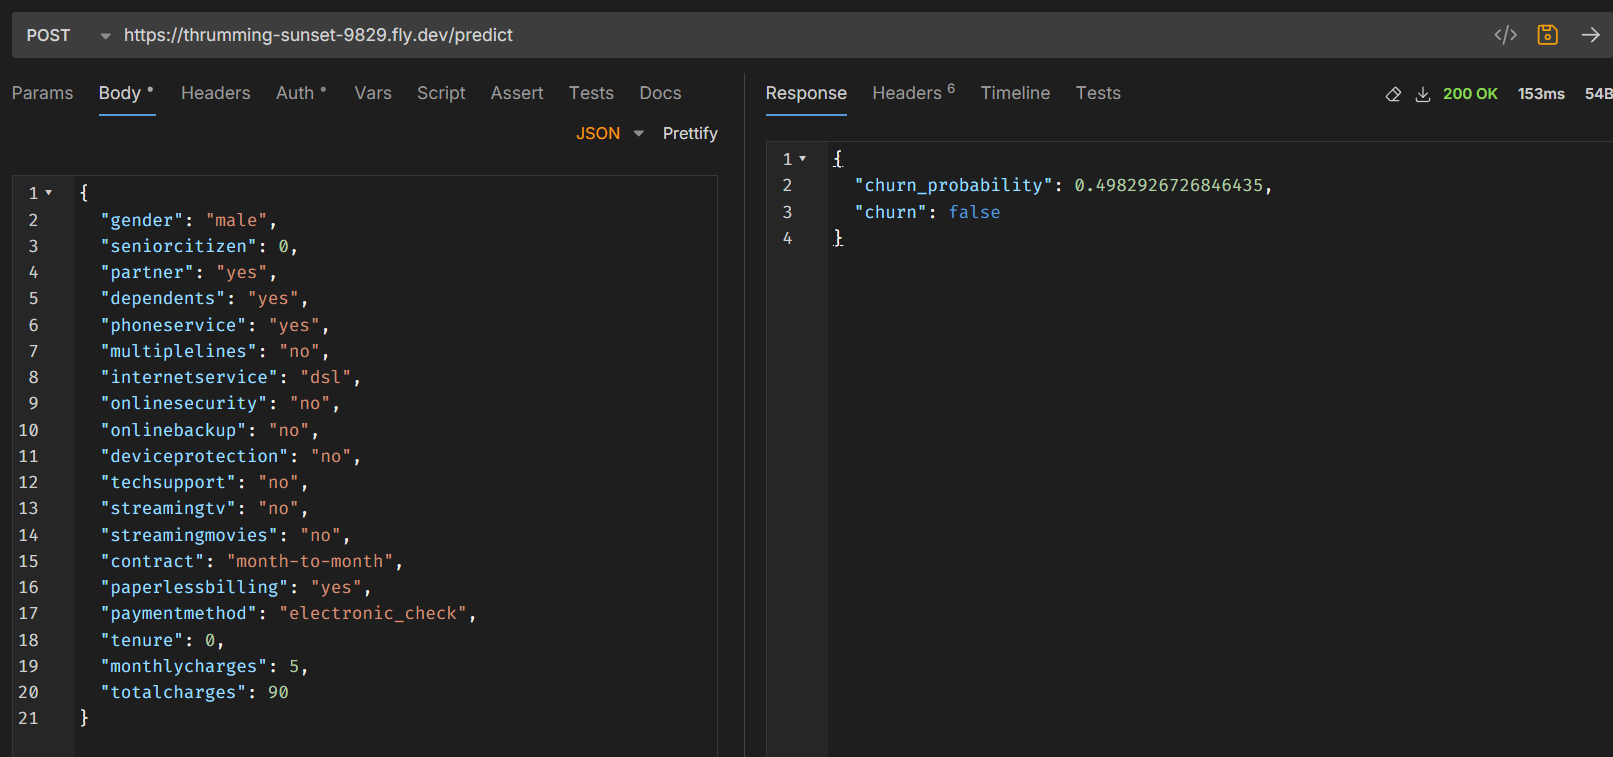

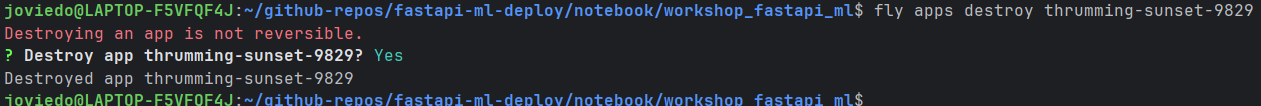